In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Temperature dependence of HCO3- dehydration
Arrhenius fits for effective first-order hydration and dehydration rate constants are from Magid & Turbeck,  1968, Biochim. Biophys. Acta 165, 515–524. These relations are at pH 7.0. Hydration and dehydration kinetics are also affected by pH and ionic strength and these effects are measured to some degree. See, for example, Johnson, K. S., 1982, Limonology And Oceanography, vol. 27, no. 5, 1982, pp. 849–55. 

Note that the measurements in Magid & Turbeck are effective first-order rate constants $k'_d$ and $k'_h$. The effective constants include both water and hydroxide-catalyzed pathways of hydration. 

# Timescale of HCO3-:CO2 equilibration

The timescale of dehydration can be derived from the differential equations for HCO3- ([H]) and CO2 ([C]). 

\begin{aligned}
\frac{\partial [H]}{\partial t} = - k'_d [H]_t + k'_h [C]_t \\
\frac{\partial [C]}{\partial t} = + k'_d [H]_t - k'_h [C]_t
\end{aligned}

The fractional remove from equilibrium is $\frac{[H]_t - [H]_e}{[H]_0 - [H]_e}$ where $[H]_e = K_{eq} \times [C]_e$ is the equilibrium concentration of HCO3- in these conditions. Since the stoichiometry of the hydration/dehydration reaction is 1:1, $[H]_0 - [H]_t  = - ([C]_t - [C]_0)$. That is, all the HCO3- accumulated or depleted over time is converted from/to CO2. This is just conservation of carbon atoms. The same relation holds for equilibrium at $t = \infty$, i.e. $[H]_e - [H]_0 = - ([C]_e - [C]_0)$. 

Since the derivatives are $0$ at equilibrium, we get find that 

\begin{aligned}
0 &= - k'_d [H]_e + k'_h [C]_e \\
\frac{[H]_e}{[C]_e} &= \frac{k'_h}{k'_c} = K_{eq} \\
[C]_e &= [H]_e \times \frac{k'_c}{k'_h}
\end{aligned}

Combining this relationship with the conservation relation above gives 

\begin{aligned}
\left[H\right]_e = [H]_0 - ([H]_e \times \frac{k'_c}{k'_h} - [C]_0)
\end{aligned}

If we assume a substantial initial disequilibrium favoring HCO3-, as is the case for the carboxysome CCM, we can neglect $[C]_0$, which gives

\begin{aligned}
\left[H\right]_e = [H]_0 - ([H]_e \times \frac{k'_c}{k'_h}) \\
\left[H\right]_e = \frac{k'_h}{k'_h + k'_c} [H]_0
\end{aligned}

Now we can uncouple the differential equation for $[H]_t$ 

\begin{aligned}
\frac{\partial [H]}{\partial t} = - k'_d [H]_t + k'_h [C]_t \\

\end{aligned}



In [2]:
def k_d(T):
    """Effective first order dehydration rate const.
    
    Magid, E., and Turbeck, B. O., BBA 1968. 
    
    params:
        T: temperature in Kelvin.
    
    returns:
        Effective first order rate const in /s units. 
    """
    log_kd = 8.60 - 3213.0/T
    return 10**(log_kd)

def k_h(T):
    """Effective first order hydration rate const.
    
    Magid, E., and Turbeck, B. O., BBA 1968. 
    
    params:
        T: temperature in Kelvin.
    
    returns:
        Effective first order rate const in /s units. 
    """
    log_kh = 11.63 - 3870.0/T
    return 10**(log_kh)


def t_half(T):
    """Timescale of HCO3-/CO2 equilibration as a function of temperature.
    
    params:
        T: temperature in kelvin.
        
    returns:
        timescale in units of seconds.
    """
    kd = k_d(T)
    kh = k_h(T)
    return np.log(2) / (kd+kh)

# Spontaneous decarboxylation of oxaloacetate
The spontaneous decarboxylation of oxaloacetate is measured at multiple temperatures by Guzman, Marcelo I., and Scot T. Martin, 2008, International Journal of Astrobiology, vol. 7, no. 3-4. 

In [3]:
def k_OAA_decarb(T):
    """First-order rate const for spontaneous decarboxylation of
       oaxaloacetate to pyruvate. 
    
    params:
        T: temperature in Kelvin.
    
    returns:
        effective first order rate const in /s units. 
    """
    log_k = 11.74 - (4956/T)
    return 10**(log_k)

# Radial diffusion timescale of HCO3-
HCO3- diffusion is assumed to be like water in water, with $D = 2000 \mu m^2 /s$ as in the [Bionumbers book](http://book.bionumbers.org/what-are-the-time-scales-for-diffusion-in-cells/). Note that the distance-time relation $\tau = \frac{R^2}{6 \times D}$ holds for radial diffusion. This is a reasonable assumption in a cyanobacterium, which has a contiguous cytoplasm, but not in a plant where diffuson between adjacent cells occurs at specific sites called plasmodesmata. 



In [4]:
D = 2000 # um^2/s
R = np.logspace(-1,3)
ts = np.power(R, 2) / (6*D)

temps = np.arange(10, 41, 10)+273.15
t_halfs = t_half(temps)

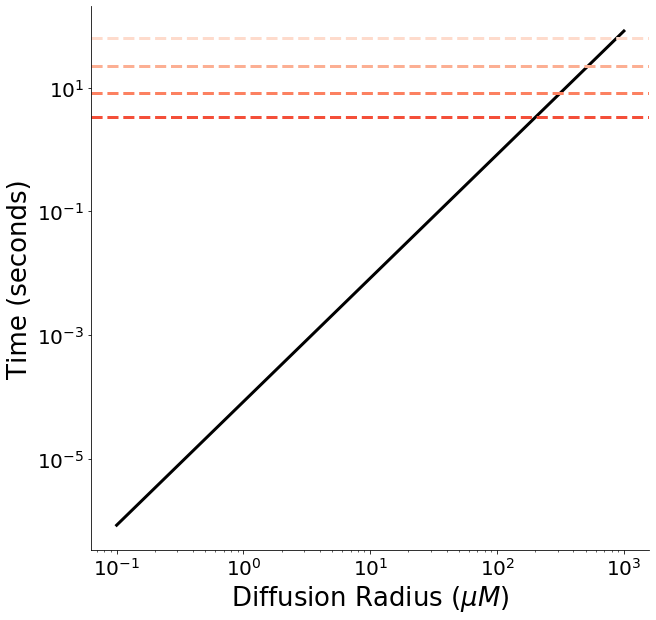

In [5]:
plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')

plt.plot(R, ts, lw=3, c='k')

pal = sns.color_palette('Reds')
for i, t in enumerate(temps):
    c = pal[i]
    plt.axhline(t_halfs[i], color=c, ls='--', lw=3)

plt.xlabel('Diffusion Radius ($\mu M$)', fontsize=26)
plt.ylabel('Time (seconds)', fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.despine()
plt.savefig('Fig1D_diffusion.png')

plt.show()

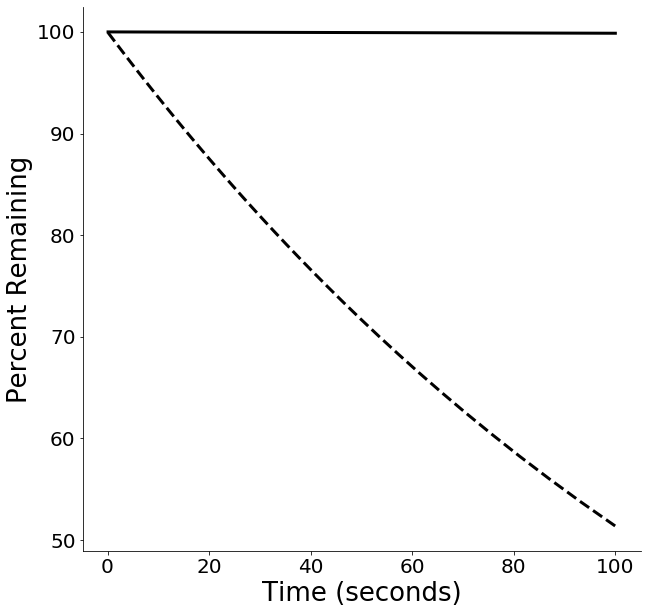

In [6]:
# Calculated from Gutknecht paper
T = 298.15
kd_eff = k_d(T)  # /s units
kOAA = k_OAA_decarb(T)

ts = np.logspace(-1, 2, 100)

plt.figure(figsize=(10,10))
pal = sns.color_palette('muted')
plt.plot(ts, 100*np.exp(-kd_eff*ts), c='k', ls='--', lw=3)
plt.plot(ts, 100*np.exp(-kOAA*ts), c='k', lw=3)
plt.xlabel('Time (seconds)', fontsize=26)
plt.ylabel('Percent Remaining', fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.despine()
plt.savefig('Fig1E_stability.png')
plt.show()